# Project Description
Since fluorescent proteins have continued to be helpful in new applications of scientific research. Our motivation for this project is that it will help us figure out the matching fluorescents in FRET systemmore efficiently, given a list of fluorescent candidates. For example, scientists can use our code to find the best fluorescent that matches the original fluorescent more efficiently when they discover a new fluorescent protein.

This project aims to use our codes to determine the ideal acceptor fluorescent protein and the donor fluorescent protein.
With a given unknown fluorophore in a Förster resonance energy transfer (FRET)system
In a FRET system, a donor emits a proton to an acceptor. The wavelength of light the donor emits should fall within the wavelength range that the acceptor can absorb.
We will find out the wavelength of the light this unknown protein absorbs and emits.
We will match the results with the excitation wavelength range and the emission range with other Fluorescent proteins.


# Team Member Names and Contributions

### Yinuo Song :
Proposed the project topic
Develop the main draft
Design the functions, loops,and class
### Zhuohao Yuan: 
Created multiple sets of 1000 points that form a normal distribution with a preset peak value - EGFP emission maximum, mCherry excitation max, and dTomato excitation max; stored these sets into csv files.
Created a method that determines which color it is given a peak value by finding the corresponding color in a table, which Yinuo built upon and modified.
### Yining Qi: 
Prepared CSV data frames of FP protein data with emission and excitation maximum and their corresponding color emission wavelength max and min values. 
Contributed to partial of the project description. 


## Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##from absorbancecurve import abso
##from wavelength import wav
##because when the function is called from another notebook file, the numpy is always undefined nomatter what
##this notebook will not call function from another notebook

## Design 2 functions to generate x,y values for a ditribution curve

In [2]:
##design 2 function that can generate a bell curve with the given data
def abso(x):
    mean=np.mean(x)
    std=np.std(x)
    y= 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y

def wav(x):
    max=np.max(x)
    min=np.min(x)
    y=np.linspace(min,max,1001)
    return y



## Read the csv file of lists of the excitation and emission wavelength values of unknown protein into 2 numpy arrays

In [21]:
##import the csv files contains the numbers of wavelengths of lights that are absorbed or emitted by the unknown protein
##the data is already normalized
##So the mean,median,mode of the data is the same
excitation=np.loadtxt(fname='excitation wavelength.csv', delimiter=',')
emission=np.loadtxt(fname='emission wavelength.csv', delimiter=',')
w1=wav(excitation)
ab1=abso(w1)
w2=wav(emission)
ab2=abso(w2)*0.95
peak_1 = np.mean(excitation)
peak_2 = np.mean(emission)

## Create a figure generating the distribution curve

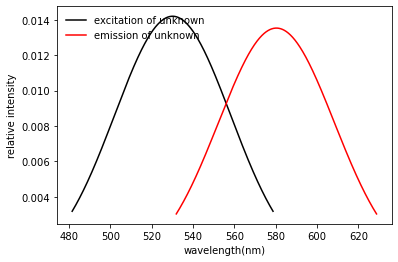

In [4]:
##create a figure of the relative intensity of the absorbed light and the emitted light
fig, ax = plt.subplots()
plt.plot(w1, ab1, color='black',label='excitation of unknown')
plt.plot(w2, ab2, color='red',label='emission of unknown')
ax.legend(loc='upper left', frameon=False)
plt.xlabel('wavelength(nm)')
plt.ylabel('relative intensity')
plt.show()

## Read the color.csv

In [5]:
##import the color file
df_color = pd.read_csv('color.csv')
df_color.head(7)


,color,wavelength max(nm),wavelength min(nm)
0,red,750,620
1,orange,620,590
2,yellow,590,570
3,green,570,495
4,cyan,520,490
5,blue,495,450
6,violet,450,380


## Design a class that has a method to determine color from the wavelength

In [6]:
##design a class that can determine the color of the light by using the dataframe above
class Pcolor:
    emc=''
    exc=''
    def __init__(self, exp, emp):
        self.exp = exp
        self.emp = emp
    def findcolor(self):
        for i in range(7):
            if self.exp <df_color.iloc[i,1] and self.exp >df_color.iloc[i,2]:
                self.exc=df_color.iloc[i,0]
                pass
        for i in range(7):
            if self.emp < df_color.iloc[i,1] and self.emp >df_color.iloc[i,2]:
                self.emc=df_color.iloc[i,0]
                pass
    

## Create a object Punknown through Pcolor, imputing the excitation peaks and the emssion peaks 
## Find out the color of lights the unknown protein absorbs and emits

In [7]:
##input the value of the peaks into the new class
##get the color of light
Punknown=Pcolor(peak_1,peak_2)
Punknown.findcolor()
print('The unknown protein absorbs',Punknown.exc,'light.')
print('The unknown protein emits',Punknown.emc,'light.')


The unknown protein absorbs green light.
The unknown protein emits yellow light.


## Read the csv file of the 57 fluorescent proteins

In [8]:
##import the fluorescent protein file
df_proteinC = pd.read_csv('fluorescent protein.csv')
df_proteinC.head(57)


,Color,Protein,Excitation Maximum(nm),Emission Maximum (nm)
0,blue,EBFP,383,445
1,blue,EBFP2,383,448
2,blue,Azurite,384,450
3,blue,mTagBFP,399,456
4,cyan,ECFP,439,476
5,cyan,mECFP,433,475
6,cyan,Cerulean,433,475
7,cyan,CyPet,435,477
8,cyan,AmCyan1,458,489
9,cyan,Midori-Ishi Cyan,472,495


## Make the color as index

In [9]:
##make the color as index
row_index = 'Color'
df_proteinC = df_proteinC.set_index(row_index)
df_proteinC.head()


,Protein,Excitation Maximum(nm),Emission Maximum (nm)
Color,,,
blue,EBFP,383,445
blue,EBFP2,383,448
blue,Azurite,384,450
blue,mTagBFP,399,456
cyan,ECFP,439,476


## Make a new dataframe that contains only green fluorescent protein

In [10]:
(rows,columns)=df_proteinC.shape
##find out protein that emit green light
df_proteinC_emgreen = df_proteinC.loc['green']
df_proteinC_emgreen


,Protein,Excitation Maximum(nm),Emission Maximum (nm)
Color,,,
green,EGFP,484,507
green,Emerald,487,509
green,Superfolder GFP,485,510
green,Azami Green,492,505
green,mWasabi,493,509
green,TagGFP,482,505
green,TurboGFP,482,502
green,AcGFP,480,505
green,ZsGreen,493,505


## Make a list of protein names

In [11]:
(grows,gcolumns)=df_proteinC_emgreen.shape
emgreen=[]
for i in range(grows):
    emgreen.append(df_proteinC_emgreen.iloc[i, 0])
emgreen

['EGFP',
 'Emerald',
 'Superfolder GFP',
 'Azami Green',
 'mWasabi',
 'TagGFP',
 'TurboGFP',
 'AcGFP',
 'ZsGreen',
 'T-Sapphire']

## Make 'Protein' the index

In [12]:
##rearrange the index of the dataframe
emgreen_row_index = 'Protein'
df_proteinC_emgreen = df_proteinC_emgreen.set_index(emgreen_row_index)
df_proteinC_emgreen.head()


,Excitation Maximum(nm),Emission Maximum (nm)
Protein,,
EGFP,484,507
Emerald,487,509
Superfolder GFP,485,510
Azami Green,492,505
mWasabi,493,509


## Define a function that can find the index of fluorescent proteins that absorbs yellow light

In [13]:

def Excolor(x):
    y=[]
    for i in range(rows):
        if x.iloc[i,1]<df_color.iloc[2,1] and x.iloc[i,1]>df_color.iloc[2,2]:
                y.append(i)
    return y

           

## Find out the row index of proteins that absorb yellow light


In [14]:

yellow=Excolor(df_proteinC)
##find the row index 
print(yellow)

[46, 47, 48, 49, 50, 51]


## Make a dataframe of the proteins that absorb yellow light

In [15]:
df_proteinC_abyellow = df_proteinC.iloc[46:52]
df_proteinC_abyellow

,Protein,Excitation Maximum(nm),Emission Maximum (nm)
Color,,,
red,mStrawberry,574,596
red,AsRed2,576,592
red,mRFP1,584,607
red,JRed,584,610
red,mCherry,587,610
red,HcRed1,588,618


## Make a list of the names of proteins that absorb yellow light

In [16]:
##make a list of the names of protein that absorbs yellow light
(yrows,ycolumns)=df_proteinC_abyellow.shape
abyellow=[]
for i in range(yrows):
    abyellow.append(df_proteinC_abyellow.iloc[i, 0])
abyellow

['mStrawberry', 'AsRed2', 'mRFP1', 'JRed', 'mCherry', 'HcRed1']

## Make 'Protein' the index

In [17]:
##rearrange the index of the dataframe
abyellow_row_index = 'Protein'
df_proteinC_abyellow = df_proteinC_abyellow.set_index(abyellow_row_index)


## Print statements of donors and acceptors combination of the unknown protein

In [18]:
print('The unknown protein can acts as a donor with protein',*abyellow, 'in the Förster resonance energy transfer.',sep =',')
print('The unknown protein can acts as an acceptor with protein',*emgreen, 'in the Förster resonance energy transfer.',sep =',')

The unknown protein can acts as a donor with protein,mStrawberry,AsRed2,mRFP1,JRed,mCherry,HcRed1,in the Förster resonance energy transfer.
The unknown protein can acts as an acceptor with protein,EGFP,Emerald,Superfolder GFP,Azami Green,mWasabi,TagGFP,TurboGFP,AcGFP,ZsGreen,T-Sapphire,in the Förster resonance energy transfer.


## Import the wavelength csv file of one emgreen protein to check if its emission wavelength range overlaps with the excitation wavelength range of the unknown

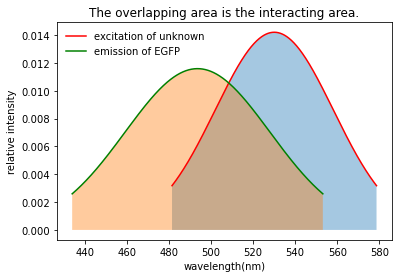

In [22]:
##pick one emgreen protein to make a graph with the unknown protein
EGFP_emission=np.loadtxt(fname='EGFP_emission_max.csv', delimiter=',')
w3=wav(EGFP_emission)
ab3=abso(w3)
fig, ax = plt.subplots()
plt.plot(w1, ab1, color='red',label='excitation of unknown')
plt.plot(w3, ab3, color='green',label='emission of EGFP')
ax.legend(loc='upper left', frameon=False)
plt.title('The overlapping area is the interacting area.')
plt.xlabel('wavelength(nm)')
plt.ylabel('relative intensity')
plt.fill_between(w1, ab1, step="pre", alpha=0.4)
plt.fill_between(w3, ab3, step="pre", alpha=0.4)
plt.show()

## Import the wavelength csv file of one abyellow protein to check if its excitation wavelength range overlaps with the emission wavelength range of the unknown

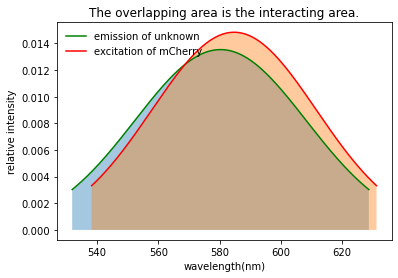

In [20]:
##pick one abyellow protein to make a graph with the unknown protein
mCherry_excitation=np.loadtxt(fname='mCherry_excitation_max.csv', delimiter=',')
w4=wav(mCherry_excitation)
ab4=abso(w4)
fig, ax = plt.subplots()
plt.plot(w2, ab2, color='green',label='emission of unknown')
plt.plot(w4, ab4, color='red',label='excitation of mCherry')
ax.legend(loc='upper left', frameon=False)
plt.title('The overlapping area is the interacting area.')
plt.xlabel('wavelength(nm)')
plt.ylabel('relative intensity')
plt.fill_between(w2, ab2, step="pre", alpha=0.4)
plt.fill_between(w4, ab4, step="pre", alpha=0.4)
plt.show()

# Reflection：
### Yinuo Song:
I lead this project. I designed the draft, all the functions and the class. Zhuohao Yuan used codes to generate all the wavelength csv files. Yining Qi generated the fluorescent protein and color csv files from data from Internet. I spend a lot of time on finding how to generate a normal ditribution curve instead of using a histogram. The final method I used is the not the perfect one, but close to what I expected. We had run into problem when generating csv files. When Zhuohao Yuan tried to produce a csv files contains 1000 values using pandas, he generate a file of 1001 with a zero at the beginning. This had caused huge problem for me when using the np.mean and np.min function. We later overcome this problem. When I created the function Excolor, I forgot that Yining has made the color as an index, so the column index number should minus 1. This also cause problems when running the whole notebook. I realize that communcation is really important when coming to groupwork. I had to constantly using a small whiteboard to explain myself. If one notion is stated not clear, my groupmate may get a really weid portion of the code. A lot of time were for debugging and debugging. But we have complete the task perfectly. I like to learn more about python in the future. This experience is really interesting.

### Zhuohao Yuan: 
I had an awesome time in this class. I had no coding experience before taking this class. I had heard that coding is really hard and debugging can take a long time, and these two factors kept me away from learning how to code. But this course helped me diminish these concerns - as our instructor made concepts really clear and engaging for students to learn. In the assignment where we had to slice a DNA sequence into chunks of three and find out if these chunks match one of two assigned codons, I was challenged because I did not know how to loop through chunks of three - as I only knew we can loop through one item at a time. But after thinking deeply for a while, I found out that I could simply use a list from 1 to 160 (with 480 nucleotides in total) and have it looped through. So I could multiply each item with 3 and then minus 3 and assign this value to be the beginning value of each chunk and assign an item multiplied by 3 as the end value for each codon. And therefore the problem of not being able to loop through chunks of three is solved.

For this final project, it challenged me and expanded my knowledge of coding because as I was creating 1000 values that form a normal distribution. I kept getting a header that shows as zero, which is troubling because once imported, this list becomes 1001 values with the starting value of zero. Therefore, after my research online, I found out that by setting header = None, I could get rid of this zero. This adds to my tool box that I could use further for my future python coding experience. Also, when creating the draft for the method of determining which color it is given a peak value by finding the corresponding color in a table, I could only do a part of the code since I have trouble getting the code to pinpoint the value in the table. My teammate helped me and modified my code to function properly which also expands my knowledge. Therefore, I feel optimistic about coding in the future and working collaboratively with someone else.


### Yining Qi: 
I came into this class with zero knowledge of Python, Jupiter notebook, and pandas, so I was nervous about practically starting a personal project with the team and doing the task at hand. This class challenged me to think critically about making my code functioning, and I learned a lot more beyond my expectation through referencing class notes and class assignments. I had a great time during this class and a good experience working with my final project team. 
The group project challenged me to think creatively and be exposed to the field of fluorescent proteins, which was new for me. As a freshman in the project topics, this final project reminds me of the growth I have experienced by looking for protein data with their corresponding colors and getting to know their application. Besides that, as a new coder, being able to use pandas to manipulate CSV data frames amazed me. 
Some aspects of the project were challenging, but overall, with teamworks and researching the topics; it was a fun expereince. 